# Homework 2

Student: Anibal Tafur

Date: Feb 8, 2022

## Part (a)

Load the csv file and then plot the recovery patterns for all damage options.

In [1]:
# Preamble
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [84]:
# Loading csv file
path = '/content/drive/MyDrive/sync/Infrastructure Resilience/'
data = pd.read_csv(path+'functionality.csv')

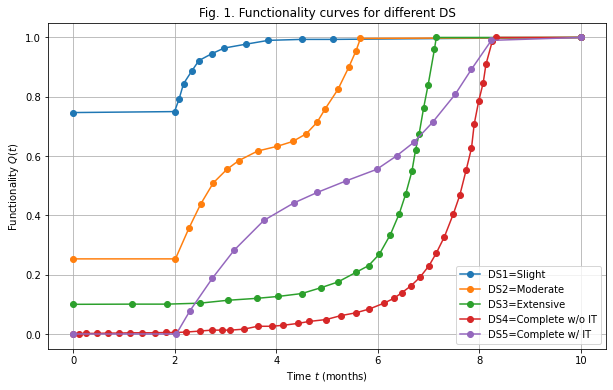

In [262]:
# Labeling Damage States for easier reference

# DS_1 = Slight Damage
# DS_2 = Moderate Damage
# DS_3 = Extensive Damage
# DS_4 = Complete Damage without Idle time
# DS_5 = Complete Damage with Idle time

# Extracting data as lists (arrays) and labeling according to DS, removing null values:

T1 = [item for item in data['Time, t (months).4'] if str(item) != 'nan']
Q1 = [item for item in data['Functionality, Q(t).4'] if str(item) != 'nan']

T2 = [item for item in data['Time, t (months).3'] if str(item) != 'nan']
Q2 = [item for item in data['Functionality, Q(t).3'] if str(item) != 'nan']

T3 = [item for item in data['Time, t (months).1'] if str(item) != 'nan']
Q3 = [item for item in data['Functionality, Q(t).1'] if str(item) != 'nan']

T4 = [item for item in data['Time, t (months)'] if str(item) != 'nan']
Q4 = [item for item in data['Functionality, Q(t)'] if str(item) != 'nan']

T5 = [item for item in data['Time, t (months).2'] if str(item) != 'nan']
Q5 = [item for item in data['Functionality, Q(t).2'] if str(item) != 'nan']

# Plotting:

plt.figure(figsize=(10,6))
plt.plot(T1,Q1,'o-',label='DS1=Slight')
plt.plot(T2,Q2,'o-',label='DS2=Moderate')
plt.plot(T3,Q3,'o-',label='DS3=Extensive')
plt.plot(T4,Q4,'o-',label='DS4=Complete w/o IT')
plt.plot(T5,Q5,'o-',label='DS5=Complete w/ IT')
plt.xlabel('Time $t$ (months)')
plt.ylabel('Functionality $Q(t)$')
plt.title('Fig. 1. Functionality curves for different DS')
plt.grid()
plt.legend()
plt.show()

## Part (b)

For each damage option, calculate the deterministic robustness and rapidity. You can find the definitions of robustness and rapidity in the class notes.


### Robustness

As defined by NIST, robustness is the inherent strength or resistance in a system to withstand external demands without degradation or loss of functionality (Gilbert et al., 2005). Mathematically, given the functionality curve $Q(t)$ for a time horizon after a disruptive event, the robustness $Rb$ is defined as:

$$Rb = 1 - L$$

Where $L$ is the initial loss of functionary right after the event. This is ilustrated in Figure 1.


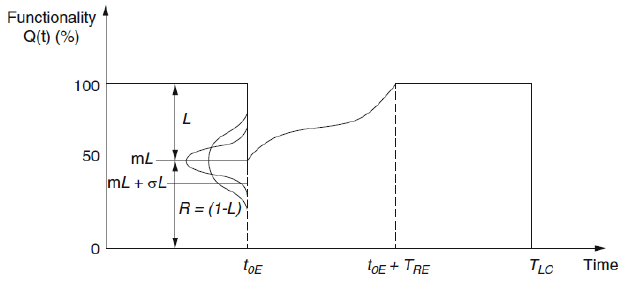

Fig. 2. Definition of Robustness (Source: Class notes)

Calculating $L$ and $Rb$ for all damage states, we have.

In [86]:
# Defining dataframe to store results
results = pd.DataFrame(index=[1,2,3,4,5])
results.index.name = 'DS'
results['DS_desc']=['Slight','Moderate','Extensive','Complete w/o IT','Complete w/ IT']

In [250]:
# Extracting initial functionality loss (L) for all DS

L_arr = []
for Qt in [Q1,Q2,Q3,Q4,Q5]:
    L_arr.append(1-Qt[0])
results['L'] = L_arr

In [254]:
# Calculating the residual functionality after the event
# Rb = Robustness 

Rb_arr = 1 - np.array(L_arr)

results['Rb'] = Rb_arr
results[['DS_desc','L','Rb']]

,DS_desc,L,Rb
DS,,,
1,Slight,0.253247,0.746753
2,Moderate,0.746753,0.253247
3,Extensive,0.900000,0.100000
4,Complete w/o IT,1.000000,0.000000
5,Complete w/ IT,1.000000,0.000000


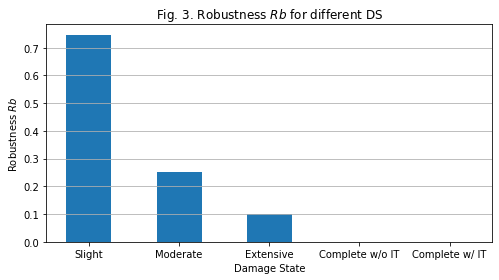

In [263]:
# Plotting results
plt.figure(figsize=(8,4))
plt.bar(results['DS_desc'],height=results['Rb'],width = 0.5)
plt.xlabel('Damage State')
plt.ylabel('Robustness $Rb$')
plt.title('Fig. 3. Robustness $Rb$ for different DS')
plt.grid(axis='y')
plt.show()

**Discussion**

From Figure 3 it is clearly observed the complete lack of robustness of both complete damage states, losing all functionality  after the disruption.

### Rapidity

As defined by NIST, rapidity is the speed with which disruption can be overcome and safety, services, and financial stability restored (Gilbert et al., 2005). Mathematically, rapidity $Rd$ in this report is estimated as the ratio of immediate loss of functionality $L$ to the recovery time $T_{RE}$

$$Rd = \frac{L}{T_{RE}}$$

To estimate a deterministic value for rapidity, it is necessary to determine the recovery time $T_{RE}$. In principle, $T_{RE}$ is defined as the time required to achieve complete functionality restoration, thus $Q(T_{RE})=1$. Nevertheless, observing the data provided for this assigment (Figure 1), it is appreciated that for DS1 (Slight Damage), an important fraction of the functionality is restored much earlier than reaching complete pre-event functionality.

Therefore, a threshold value of functionality $Q_{min}$ is utilized to define $T_{RE}$, to represent rapidity in a more realistic manner. Hereafter, $T_{RE}$ is defined as follows.

$$Q(T_{RE}) \geq Q_{min}$$

For this report, a referencial value of $Q_{min}$ = 0.98 is considered. To illustrate the difference in Rapidity values considering different thresholds of functionality, rapidity values are compared to those obtained considering $Q_{min}$ = 1.

In [256]:
# Defining a function to obtain recovery time from a recovery curve:

def get_recovery_time(T_arr,Q_arr,threshold):
    '''
    T_arr = list of time values of recovery curve
    Q_arr = list of Q(t) values of recovery curve
    threshold = minimum functionality value considered for complete recovery

    Returns Tre = recovery time calculated as the time where the first value of Q(t)
    exceeds the defined threshold
    '''
    for pos in range(len(T_arr)):
        if Q_arr[pos] >= threshold:
            return T_arr[pos]
            break

In [264]:
# Calculating recovery time Tre for threshold = 0.98

threshold = 0.98

Tre_arr = []
for (T_arr,Q_arr) in [(T1,Q1),(T2,Q2),(T3,Q3),(T4,Q4),(T5,Q5)]:
    Tre = get_recovery_time(T_arr,Q_arr,threshold)
    Tre_arr.append(Tre)

results['Tre'] = Tre_arr

# Calculating rapidity Rd for threshold = 0.98

results['Rd'] = results['L']/results['Tre']

In [270]:
# Calculating recovery time for threshold = 1

threshold = 1

Tre_arr_2 = []

for (T_arr,Q_arr) in [(T1,Q1),(T2,Q2),(T3,Q3),(T4,Q4),(T5,Q5)]:
    Tre = get_recovery_time(T_arr,Q_arr,threshold)
    Tre_arr_2.append(Tre)

results['Tre_2'] = Tre_arr_2

# Calculating rapidity Rd for threshold = 1

results['Rd_2'] = results['L']/results['Tre_2']

In [272]:
# Showing rapidity results
# 'Tre_2' and 'Rd_2' correspond to values considering Qmin = 1
results[['DS_desc','L','Tre','Rd','Tre_2','Rd_2']]

,DS_desc,L,Tre,Rd,Tre_2,Rd_2
DS,,,,,,
1,Slight,0.253247,3.843417,0.065891,10.000000,0.025325
2,Moderate,0.746753,5.658363,0.131973,10.000000,0.074675
3,Extensive,0.900000,7.153025,0.125821,7.153025,0.125821
4,Complete w/o IT,1.000000,8.256227,0.121121,8.327402,0.120085
5,Complete w/ IT,1.000000,8.238434,0.121382,10.000000,0.100000


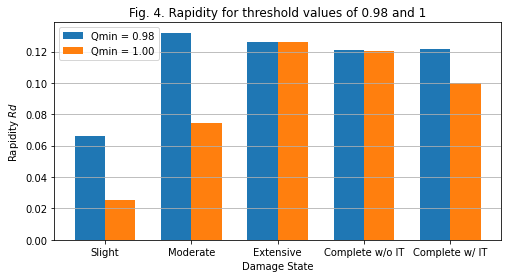

In [273]:
# Plotting results

labels = list(results['DS_desc'])

sample1 = results['Rd']
sample2 = results['Rd_2']

x = np.arange(len(labels)) # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sample1, width, label='Qmin = 0.98')
rects2 = ax.bar(x + width/2, sample2, width, label='Qmin = 1.00')

ax.set_ylabel('Rapidity $Rd$')
ax.set_xlabel('Damage State')
ax.set_title('Fig. 4. Rapidity for threshold values of 0.98 and 1')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.set_figwidth(8)
plt.grid(axis='y')
plt.show()

**Discussion**

For the case of DS1 (Slight) and DS2 (Moderate), it is observed a substantial difference between rapidity estimations considering different values of $Q_{min}$. In contrast, for the rest of DS, the difference is not as considerable. In conclusion, recovery times need to consider adequate functionality threshold values, since the term "recovery" can be subjective and dependant on the type of system analyzed. Also, as observed in this case,  small differences in the considered $Q_{min}$ can lead to dramatically differente rapidity estimations.

## Part (c)

For each damage option, calculate the resilience index using the idea of resilience triangle.

**Solution**

For this report, resilience triangle $Rt$ is defined using the variables observed in Figure 2, loss of functionality $L$ and recovery time $T_{RE}$, as follows.

$$R_t = \frac {L \,\, T_{RE}}{2} $$

In [188]:
# Triangle area will be Rt = L*Tre/2

results['Rt'] = results['L']*results['Tre']/2
results[['DS_desc','L','Tre','Rt']]

,DS_desc,L,Tre,Rt
DS,,,,
1,Slight,0.253247,2.971530,0.376265
2,Moderate,0.746753,5.569395,2.079482
3,Extensive,0.900000,7.117438,3.202847
4,Complete w/o IT,1.000000,8.256227,4.128114
5,Complete w/ IT,1.000000,8.238434,4.119217


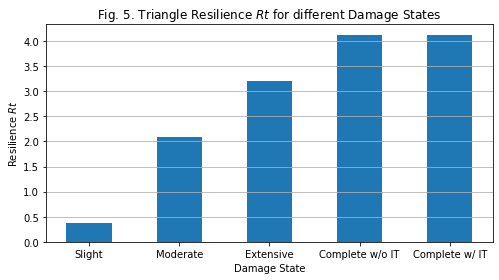

In [274]:
# Plotting results
plt.figure(figsize=(8,4))
plt.bar(results['DS_desc'],height=results['Rt'], width = 0.5)
plt.xlabel('Damage State')
plt.ylabel('Resilience $Rt$')
plt.title('Fig. 5. Triangle Resilience $Rt$ for different Damage States')
plt.grid(axis='y')
plt.show()

**Discussion**

Triangle resilience $Rt$ measures resilience taking into consideration the amount of damage sustained and the rapidity of the recovery. It is thefore expected that for DS1 (Slight), the resilience value is considerable lower than those of other DS, since the loss of functionality sustained is substantially lower. It is also observed that for the complete damage states (DS4 and DS5), values of $Rt$ are practically equal despite their different recovery paths, since their parameters $L$ and $T_{RE}$ are similar.

## Part (d)

For each damage option, calculate the resilience index based on Bruneau et al. (2003) definition.

**Solution**

According to  Bruneau et al. (2003), resilience $R_1$ is estimated as follows:

$$R_1 = \int_{t_0}^{t_r}{[1 - Q(t)]}dt$$

For our case, $t_0$ = 0 for all damage states, and $t_r$ = $T_{RE}$.

In [190]:
# Calculating resilience R1 based on Bruneau et al. (2003)

R1_arr=[]

for (DS,T_arr,Q_arr) in [(1,T1,Q1),(2,T2,Q2),(3,T3,Q3),(4,T4,Q4),(5,T5,Q5)]:
    
    Tre = results.at[DS,'Tre'] # Recovery time
    L = results.at[DS,'L'] # Initial loss of functionality
    pos = T_arr.index(Tre) # Position of recovery time in array

    # Integral from t = 0 up to t = Tre
    R1 = 1*Tre-np.trapz(Q_arr[0:pos+1], x=T_arr[0:pos+1])

    R1_arr.append(R1)

results['R1'] = R1_arr

# Showing results
results[['DS_desc','Tre','R1']]

,DS_desc,Tre,R1
DS,,,
1,Slight,2.971530,0.601111
2,Moderate,5.569395,2.875139
3,Extensive,7.117438,5.755592
4,Complete w/o IT,8.256227,7.290765
5,Complete w/ IT,8.238434,5.140413


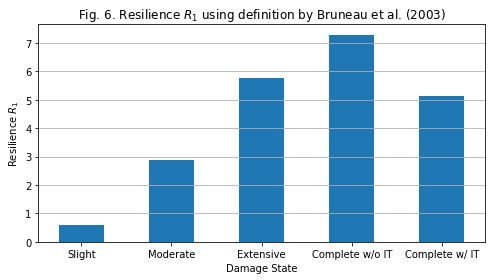

In [278]:
# Plotting results
plt.figure(figsize=(8,4))
plt.bar(results['DS_desc'],height=results['R1'], width = 0.5)
plt.xlabel('Damage State')
plt.ylabel('Resilience $R_1$')
plt.title('Fig. 6. Resilience $R_1$ using definition by Bruneau et al. (2003)')
plt.grid(axis='y')
plt.show()

**Discussion**

For this case, it is appreciated a considerable difference in the $R_1$ resilience values for the complete damage states (DS4 and DS5), reflecting their different recovery paths, contrary to what was observed using the triangle resilience $R_t$.

## Part (e)

For each damage option, calculate the resilience index based on Frangopol and Bocchini (2011) definition.

**Solution**

According to  Frangopol and Bocchini (2011), resilience index $R_3$ is defined as follows.

$$R_3 = \frac{\int_{t_0}^{t_0+t_h}{Q(t)dt}}{t_h}$$

Where $t_h$ is the time horizon for the analysis. For this report, $t_h$ is considered as 10 months.

In [281]:
th = 10 # Time horizon for all damage states

R3_arr = []

for (DS,T_arr,Q_arr) in [(1,T1,Q1),(2,T2,Q2),(3,T3,Q3),(4,T4,Q4),(5,T5,Q5)]:
    pos = T_arr.index(th)

    # Integrating over the time horizon period
    R3 = np.trapz(Q_arr, x=T_arr) / th

    R3_arr.append(R3)
results['R3'] = R3_arr

# Showing results
results[['DS_desc','R3']]

,DS_desc,R3
DS,,
1,Slight,0.935397
2,Moderate,0.711565
3,Extensive,0.424371
4,Complete w/o IT,0.270877
5,Complete w/ IT,0.485101


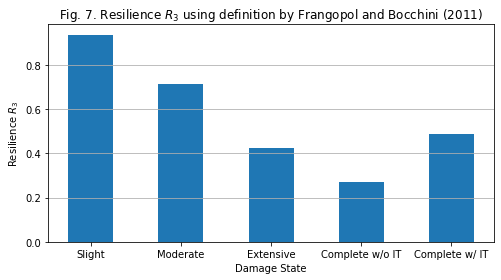

In [284]:
# Plotting results
plt.figure(figsize=(8,4))
plt.bar(results['DS_desc'],height=results['R3'], width = 0.5)
plt.xlabel('Damage State')
plt.ylabel('Resilience $R_3$')
plt.title('Fig. 7. Resilience $R_3$ using definition by Frangopol and Bocchini (2011)')
plt.grid(axis='y')
plt.show()

**Discussion**

It is observed that, in contrast to what was estimated using $R_t$ and $R_1$, resilience values are considerably higher for less severe damage states. This is due to the different approaches followed in this methods, $R_t$ and $R_1$ consider the area over the curves, and $R_3$ considers the area below. Another observation is that $R_3$ is normalized by the time horizon, therefore, curves with different recovery times can be analyzed and compared.

As additional discussion, Figure 8 shows normalized values of $R_t$ and $R_1$, namely, $R'_t$ and $R'_1$, which are then compared to the already normalized $R_3$. $R'_t$ and $R'_1$ are obtained by normalizing using the area $L\times T_{RE}$.

$$R'_t = \frac{R_t}{L \, \, T_{RE}} \,,  R'_1 = \frac{R_1}{L \, \, T_{RE}}$$

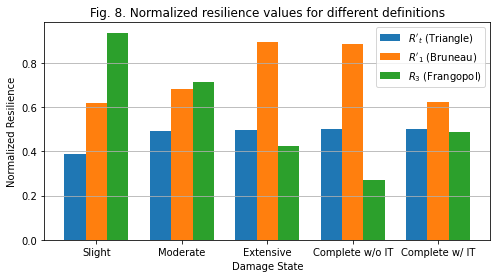

In [294]:
# Plotting results

labels = list(results['DS_desc'])

sample1 = results['Rt']/(results['L']*results['Tre'])
sample2 = results['R1']/(results['L']*results['Tre'])
sample3 = results['R3']

x = np.arange(len(labels)) # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, sample1, width, label="$R'_t$ (Triangle)")
rects2 = ax.bar(x , sample2, width, label="$R'_1$ (Bruneau)")
rects3 = ax.bar(x + width, sample3, width, label="$R_3$ (Frangopol)")

ax.set_ylabel('Normalized Resilience')
ax.set_xlabel('Damage State')
ax.set_title('Fig. 8. Normalized resilience values for different definitions')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.set_figwidth(8)
plt.grid(axis='y')
plt.show()

**Discussion**

There exists a considerable difference in resilience estimations using different approaches, due to the substantial different aproaches that they take. Nevertheless, similarities are found for triangle resilience $R_t$ and $R_1$ in the sense that they use the area over the functionality curve, as opossed to $R_3$. This explains the similar values of resilience index for DS5 (complete with idle time), since areas over and below its $Q(t)$ curve are relatively similar. Another key difference of $R_3$ is the normalization by time horizon for all the curves.

In conclusion, these methods carry subjectivity in their approaches and definitons, and for application is real-life infrastructure systems, additional criteria related to the system characteristics and analysis objectives has to be taken into account to determine an adequate resilience measure.

## Part (f)

Consider these two damage options: (I) Complete damage with idle time and (II) Complete damage without idle time. If we assume that the change in idle times does not impact the recovery path, what is the minimum idle time for Option (I) to have the resilience index lower than Option (II)?

**Discussion**

For this part, the resilience definition by Frangopol and Bocchini (2011) is used since, since this is the case where additional idle time would cause the resilience index to decrease. This is because this approach considers the area below the functionality curve.

Figure 9 shows the relation between idle time and resilience for Option I, considering that the recovery path remains unaltered. The estimated resilience $R_3$ calculated for Option II in Part (f) is shown over the plot.

In [222]:
# Using R3 definition Frangopol and Bocchini (2011)
# Current idle time (Ti) for DS5: Ti = 2.0284698 months
# Calculating Resilience for varios idle times (assuming no modification of recovery path):

Ti_arr = T5

Rmod_arr = [] # Storing resilience values

for Ti in Ti_arr:

    pos = T5.index(Ti) 

    # Integrating from t = Ti to t = 10
    Rmod = np.trapz(Q5[pos:len(Q5)+1], x=T5[pos:len(Q5)+1])
    Rmod_arr.append(Rmod)

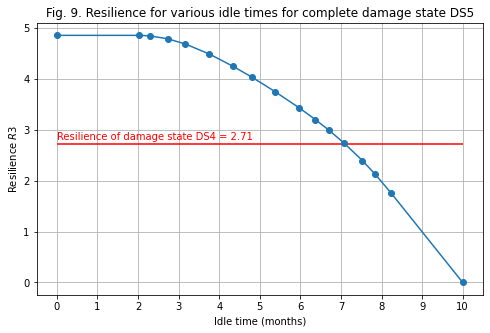

In [295]:
# Plotting
plt.figure(figsize=(8,5))
plt.plot(Ti_arr,Rmod_arr,'o-')
plt.hlines(y=2.7087729613013662,xmin=0,xmax=10,colors='red')
plt.text(x=0,y=2.8,s='Resilience of damage state DS4 = 2.71',fontdict={'color':'red'})
plt.xticks(np.arange(11))
plt.grid()
plt.xlabel('Idle time (months)')
plt.ylabel('Resilience $R3$')
plt.title('Fig. 9. Resilience for various idle times for complete damage state DS5')
plt.show()

**Discussion**

It would take an idle time of at least 7 months for DS5 (Option I) to reach resilience less than 2.71, which was estimated for DS4 (Option II).

## Part (g)

Discuss the results from Part (b) to Part (f).

**Discussion**

Results from  Part (b) and Part (f) show that for both options, rapidity and robustness are similar. Nevertheless, the difference in recovery paths cause resilience estimations to differ. More specifically, it would take an additional idle time of approximately 4.3 months for  Option I to have less resilience index than Option II. 

One possible explanation for the fact that having an idle time causes Option I to have larger resilience index than Option II is that this initial period with null functionality indicates that activities in this system are likely paralized, which would allow to accommodate potential restoration activities.

On the other hand, in Option II, the system downtime is considerably shorter, although with very low functionality at the beggining of the recovery. In this case, restoration activities may be less efficient than Option I scenario, since operations (even at low functionality levels) are likely to interfer with restoration tasks.

This might reflect in the shape of the recovery path, and consequently, in the resilince index estimation. For example, at month 1, activities are paralized for Option I but Option II presents functionality larger than 0, although very low. Nevertheless, by month 4, 40% of functionality is restored for Option I, compared to the 4% for Option II.



## References

* Bocchini, P., & Frangopol, D. M. (2011). A probabilistic computational framework for bridge network optimal maintenance scheduling. Reliability Engineering & System Safety, 96(2), 332-349.

* Bruneau, M., Chang, S. E., Eguchi, R. T., Lee, G. C., O'Rourke, T. D., Reinhorn, A. M., ... & Von Winterfeldt, D. (2003). A framework to quantitatively assess and enhance the seismic resilience of communities. Earthquake spectra, 19(4), 733-752.

* Gilbert, S. W., Butry, D. T., Helgeson, J. F., & Chapman, R. E. (2015). Community resilience economic decision guide for buildings and infrastructure systems. NIST special publication, 1197.


In [300]:
%%capture
!jupyter nbconvert '/content/drive/My Drive/sync/Infrastructure Resilience/HW2.ipynb' --to html